**NAMA : DELILA SEPTIANI DWI PUTRI**

**NIM  : 1306620028**

**KELAS : FISIKA A 2020**

--- 
### **TUGAS 6 PENGOLAHAN CITRA DIGITAL**

In [104]:
import numpy as np
import numpy.fft as fp
import matplotlib.pylab as pylab 
from skimage.color import rgb2gray
from skimage import color
from skimage.io import imread
from scipy import fftpack

### **1.2. Input Gambar dan Transformasi FFT**

In [105]:
im = rgb2gray(imread('../Tugas PCD_Transform Citra With FFT/Beruang.jpeg'))
freq = fp.fft2(im)
im1 = fp.ifft2(freq).real

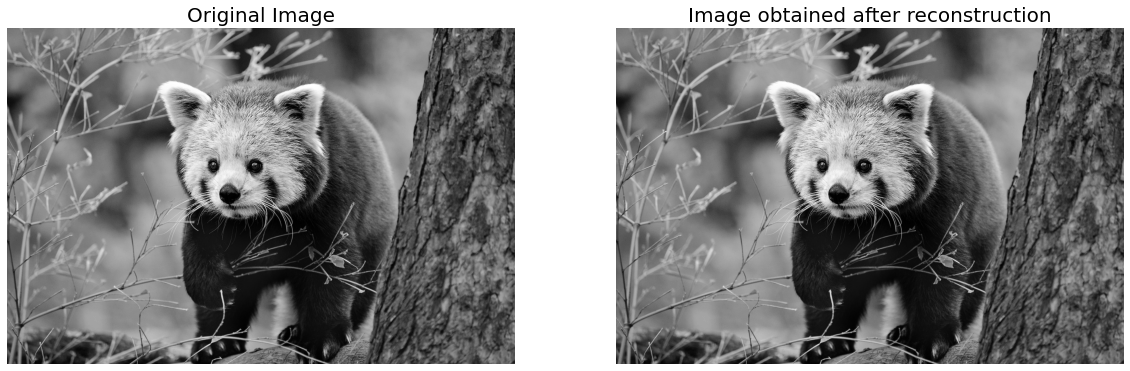

In [106]:
pylab.figure(figsize=(20,10))
pylab.subplot(121), pylab.imshow(im,  cmap='gray'), pylab.axis('off')
pylab.title('Original Image', size=20)
pylab.subplot(122), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.title('Image obtained after reconstruction', size=20)
pylab.show()

### **3. Plot FFT Spectrum dan Phase Spectrum**

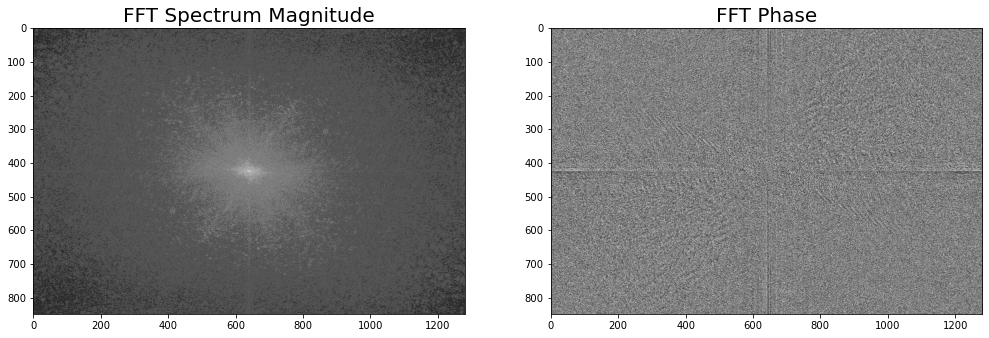

In [107]:
FFT_freq = freq.copy()
FFT_freq = fp.fftshift(FFT_freq)
Phase_freq = np.angle(FFT_freq)
pylab.figure(figsize=(17,17))
pylab.subplot(1,2,1), pylab.imshow(20*np.log10( 0.01 +np.abs(FFT_freq)).astype(int))
pylab.title('FFT Spectrum Magnitude', size=20)
pylab.subplot(1,2,2), pylab.imshow(Phase_freq.astype(int))
pylab.title('FFT Phase', size=20)
pylab.show()

### **4. Transformasi Balik FFT**

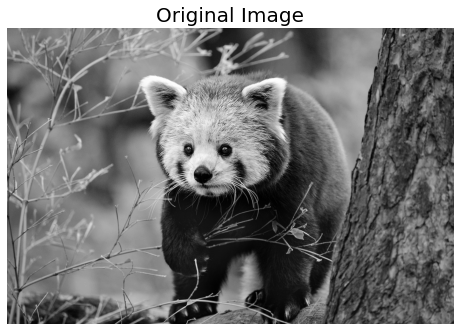

In [108]:
invers_im= fp.ifft2(freq).real
pylab.figure(figsize=(8, 8))
pylab.imshow((invers_im), cmap = 'gray')
pylab.title('Original Image', size=20); pylab.axis('off'); pylab.show()

### **5. Variasi Threshold dan Ditransformasi Balik**

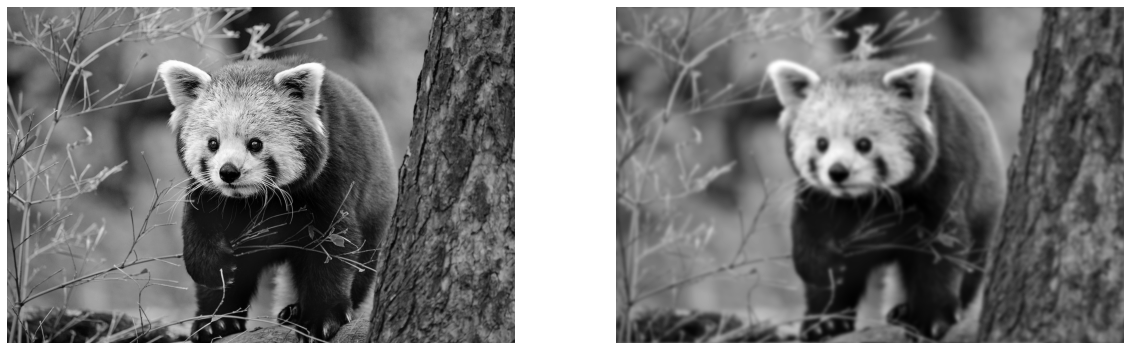

In [109]:
import numpy.fft as fp
from scipy import ndimage
fig, (axes1, axes2) = pylab.subplots(1, 2, figsize=(20,10))
pylab.gray()
im = np.mean(imread('../Tugas PCD_Transform Citra With FFT/Beruang.jpeg'), axis=2)
freq = fp.fft2(im)
freq_gaussian = ndimage.fourier_gaussian(freq, sigma=4)
im1 = fp.ifft2(freq_gaussian)
axes1.imshow(im), axes1.axis('off'), axes2.imshow(im1.real)
axes2.axis('off')
pylab.show()

C:\Users\MALLIKA\AppData\Local\Temp/ipykernel_13440/3763794051.py:2: ComplexWarning: Casting complex values to real discards the imaginary part
  pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_gaussian))).astype(int))


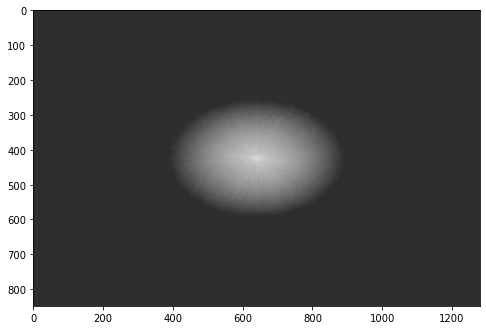

In [110]:
pylab.figure(figsize=(8,8))
pylab.imshow( (20*np.log10( 0.1 + fp.fftshift(freq_gaussian))).astype(int))
pylab.show()

#### **LPF dengan scipy fftpack**

In [111]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

2.4023323931179217


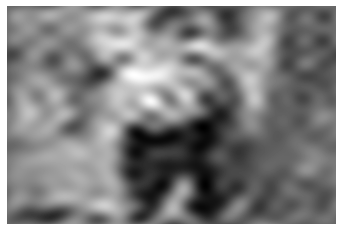

In [112]:
from scipy import fftpack
from PIL import Image
im = np.array(Image.open('../Tugas PCD_Transform Citra With FFT/Beruang.jpeg').convert('L'))
# low pass filter
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
freq1 = np.copy(freq)
freq2 = fftpack.fftshift(freq1)
freq2_low = np.copy(freq2)
freq2_low[half_w-10:half_w+11,half_h-10:half_h+11] = 0 
freq2 -= freq2_low
im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
print(signaltonoise(im1, axis=None))
# 2.389151856495427
pylab.imshow(im1, cmap='gray'), pylab.axis('off')
pylab.show()

In [113]:
pylab.figure(figsize=(10,10))
pylab.imshow((10*np.log10( 0.1 + freq2)).astype(int))
pylab.title('Spectrum after LPF', size=); pylab.axis('off')
pylab.show()

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (Temp/ipykernel_13440/3006733520.py, line 3)

#### **Penerapan LPF dengan Nilai Cutoff Frekuensi yang Berbeda**

In [ ]:
im = np.array(Image.open('../Tugas PCD_Transform Citra With FFT/Beruang.jpeg').convert('L'))
freq = fp.fft2(im)
(w, h) = freq.shape
half_w, half_h = int(w/2), int(h/2)
snrs_lp = []
ubs = list(range(1,25))
pylab.figure(figsize=(12,20))
for u in ubs:
 freq1 = np.copy(freq)
 freq2 = fftpack.fftshift(freq1)
 freq2_low = np.copy(freq2)
 freq2_low[half_w-u:half_w+u+1,half_h-u:half_h+u+1] = 0
 freq2 -= freq2_low # select only the first 20x20 (low) frequencies
 im1 = fp.ifft2(fftpack.ifftshift(freq2)).real
 snrs_lp.append(signaltonoise(im1, axis=None))
 pylab.subplot(6,4,u), pylab.imshow(im1, cmap='gray'), pylab.axis('off')
 pylab.title('F = ' + str(u), size=20)
pylab.subplots_adjust(wspace=0.1, hspace=0)
pylab.show()